In [21]:
import copy
from libpysal.weights import WSP, W
from libpysal.weights.util import WSP2W
import seaborn as sn
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

# Upload morning commutes
Original source: https://data.gov.il/dataset/tripscelular_1819

In [52]:
#dataset of morning traffic in tel aviv area in normal weekday
df_traffic = pd.read_csv("morning_traffic_telaviv_example.csv", index_col=0)

In [55]:
df_traffic = df_traffic.reset_index(drop=True)

# Upload geometry of tracel zones
Original source: https://data.gov.il/dataset/tripscelular_1819

In [15]:
# geometry of travel zones
gdf = gpd.read_file("Documents/phd/data/israel/migration/travel_zones_telaviv_example.geojson")

# Create Queen adjacency matrix

For this type of matrix only geometry is needed

In [16]:
gdf.shape

(189, 11)

In [18]:
gdf.head()

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,CITY,NEIGHBOURH,DISTRIC,SUBDISTRIC,AREA,art_col,geometry
0,100047,2000173,300019,40000008,תל אביב,שפירא וקרית שלום,5,51,2050799.0,1,"POLYGON ((179454.925 661641.594, 179474.747 66..."
1,100046,2000173,300019,40000008,תל אביב,נווה שאנן,5,51,446344.0,1,"POLYGON ((179893.233 662412.240, 179880.694 66..."
2,100045,2000170,300019,40000008,תל אביב,פלורנטין,5,51,816988.0,1,"POLYGON ((178137.348 662496.620, 178118.727 66..."
3,100044,2000172,300019,40000008,תל אביב,נווה עופר,5,51,501204.0,1,"POLYGON ((178341.402 660454.169, 178114.614 66..."
4,100049,2000174,300019,40000008,תל אביב,שיכון עממי ג',5,51,1753226.0,1,"POLYGON ((181271.106 662306.509, 181278.902 66..."


In [29]:
#pysal works better with when id is index (range) rather than code
gdf = gdf.reset_index()

In [30]:
%%time
mx_queen = weights.contiguity.Queen.from_dataframe(gdf, geom_col="geometry")

CPU times: user 36.4 ms, sys: 5.26 ms, total: 41.6 ms
Wall time: 55 ms


### Explore

In [46]:
type(mx_queen)

libpysal.weights.contiguity.Queen

In [42]:
# matrix N*N filled by 0/1
mx_queen.full()[0]

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [43]:
mx_queen.full()[0].shape

(189, 189)

In [45]:
#dict of neighbors
mx_queen.neighbors

{0: [1, 2, 3, 6, 7, 136, 12, 183],
 1: [0, 2, 12, 140, 15, 145, 19, 184, 185],
 2: [0, 1, 179, 183, 184],
 3: [0, 6, 7, 70, 183],
 4: [132, 5, 42, 140, 13, 15, 16, 47, 19, 20, 92],
 5: [145, 4, 20, 21, 22, 140],
 6: [0, 3, 85, 70, 136],
 7: [0, 3, 70, 183, 8, 9, 56],
 8: [56, 9, 52, 7],
 9: [8, 183, 7],
 10: [99, 120, 106, 11, 14],
 11: [10, 98, 99, 102],
 12: [0, 1, 18, 19, 136, 15],
 13: [16, 18, 131, 132, 4],
 14: [97, 99, 100, 119, 120, 10, 109],
 15: [16, 1, 145, 19, 4, 140, 12],
 16: [18, 19, 4, 13, 15],
 17: [18, 135],
 18: [131, 135, 136, 12, 13, 16, 17, 19],
 19: [16, 1, 18, 4, 136, 12, 15],
 20: [4, 5, 21, 22, 42, 43, 125],
 21: [145, 20, 5, 22, 182, 94],
 22: [5, 172, 142, 20, 21, 182, 125, 94],
 23: [88, 89, 68, 54],
 24: [40, 25],
 25: [161, 24, 40, 28, 29],
 26: [174, 186, 123, 124, 125, 142],
 27: [161, 148, 135, 28, 29],
 28: [161, 27, 29, 25],
 29: [40, 25, 27, 28],
 30: [32, 36, 37, 31],
 31: [32, 115, 36, 116, 124, 30],
 32: [33, 37, 38, 44, 116, 124, 30, 31],
 33: [

### Visualize

/opt/homebrew/anaconda3/envs/spatial_analysis_course/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
/opt/homebrew/anaconda3/envs/spatial_analysis_course/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
/opt/homebrew/anaconda3/envs/spatial_analysis_course/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want

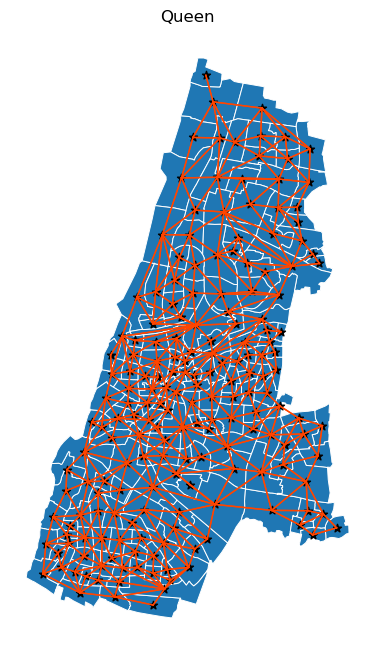

In [37]:
f, ax = plt.subplots(1, figsize=(15,8))
gdf.plot(ax=ax, edgecolor='white', linewidth=0.7)
mx_queen.plot(
    gdf,
    indexed_on ='index',
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen");

# Create matrix based on mobility

To create custom matrix we have to define 2 dictionaries: neighbors and weights

**!! It is important to have the same size of rows and columns, so we have to make sure that all zones where there is incoming or outgoing traffic are presented as index in neighbors and weights object**

In [97]:
print(f"len of full matrix is {189*189-189}, len of data is  {len(df_traffic)}")

len of full matrix is 35532, len of data is  271


### Add missing traffic
easiest way is to do cross join and replace nulls with 0 traffic, then remove zones which dont have any traffic

In [ ]:
gdf["1"] = 1
gdf_cross = gdf[['TAZ_1270','1']].merge(gdf[['TAZ_1270','1']], on = "1", suffixes=('_from','_to'))
gdf_cross = gdf_cross[gdf_cross['TAZ_1270_from']!=gdf_cross['TAZ_1270_to']]

In [103]:
gdf_cross.shape

(35532, 3)

In [105]:
gdf_cross

,TAZ_1270_from,1,TAZ_1270_to
1,100047,1,100046
2,100047,1,100045
3,100047,1,100044
4,100047,1,100049
5,100047,1,100048
...,...,...,...
35715,100030,1,100039
35716,100030,1,100038
35717,100030,1,100037
35718,100030,1,100032


In [106]:
df_traffic_cross = gdf_cross.merge(df_traffic
                 ,right_on = ['fromZone', 'ToZone']
                 , left_on = ['TAZ_1270_from','TAZ_1270_to']
                 , how = 'left')

In [108]:
df_traffic_cross["morning_traffic"] = df_traffic_cross["morning_traffic"].fillna(0)

In [127]:
df_taz_total_traffic = df_traffic_cross.groupby(['TAZ_1270_from'])["morning_traffic"].sum().rename("outgoing_traffic").to_frame().join(
    df_traffic_cross.groupby(['TAZ_1270_to'])["morning_traffic"].sum().rename("incoming_traffic").to_frame()
)

In [129]:
df_taz_total_traffic.head()

,outgoing_traffic,incoming_traffic
TAZ_1270_from,,
100002,113.957143,129.143266
100003,0.000000,0.000000
100004,342.526025,197.801348
100005,552.480507,233.210722
100006,0.000000,0.000000


In [130]:
taz_final_list = df_taz_total_traffic[df_taz_total_traffic.sum(axis=1)>0].index

In [131]:
taz_final_list.shape

(91,)

In [151]:
df_traffic_cross_cleaned = df_traffic_cross[(
    df_traffic_cross['TAZ_1270_from'].isin(taz_final_list))&(
        df_traffic_cross['TAZ_1270_to'].isin(taz_final_list)
                                           )]

In [155]:
df_traffic_cross_cleaned.shape

(8190, 6)

### Create the dictionaries of neighbors and weights

In [152]:
neighbors = df_traffic_cross_cleaned.groupby(['TAZ_1270_from'])['TAZ_1270_to'].apply(list).to_dict()

In [153]:
weights = df_traffic_cross_cleaned.groupby(['TAZ_1270_from'])['morning_traffic'].apply(list).to_dict()

In [154]:
w_mobility = W(neighbors, weights )

In [158]:
type(w_mobility)

libpysal.weights.weights.W

In [159]:
w_mobility.full()[0].shape

(91, 91)

### Visualize

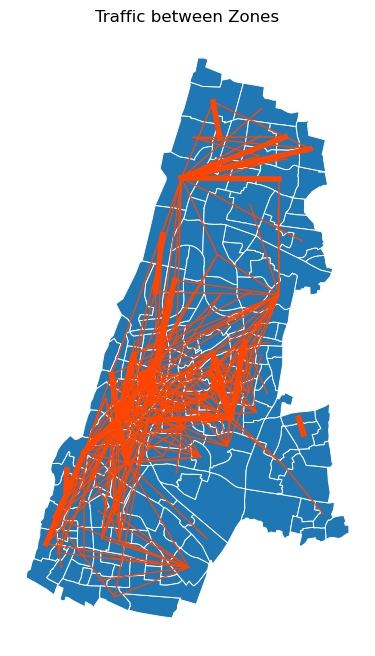

In [194]:
import matplotlib.pyplot as plt

# Plot the zones
f, ax = plt.subplots(1, figsize=(15, 8))
gdf.plot(ax=ax, edgecolor='white', linewidth=0.7)

for _, row in df_traffic.iterrows():
    from_zone = gdf.loc[gdf['TAZ_1270'] == row['fromZone'], 'geometry'].values[0]
    to_zone = gdf.loc[gdf['TAZ_1270'] == row['ToZone'], 'geometry'].values[0]
    
    # Create a line geometry between from_zone and to_zone
    line = plt.Line2D([from_zone.centroid.x, to_zone.centroid.x], 
                      [from_zone.centroid.y, to_zone.centroid.y], 
                      linewidth=(row['morning_traffic']//100)**2, color="orangered")
    
    # Add the line to the plot
    ax.add_line(line)

ax.set_axis_off()
ax.set_title("Traffic between Zones")
plt.show()